Student ID: 23001152 <br>
Name: Sravanth Baratam

Problem 1:

Using matplotlib, plot the two points (x1,y1)=(3,5) and (x2,y2)=(7,2) and the line that passes through both points. The line must continue to the edges of the plot. (I.e., it is not just a line segment connecting the points.)

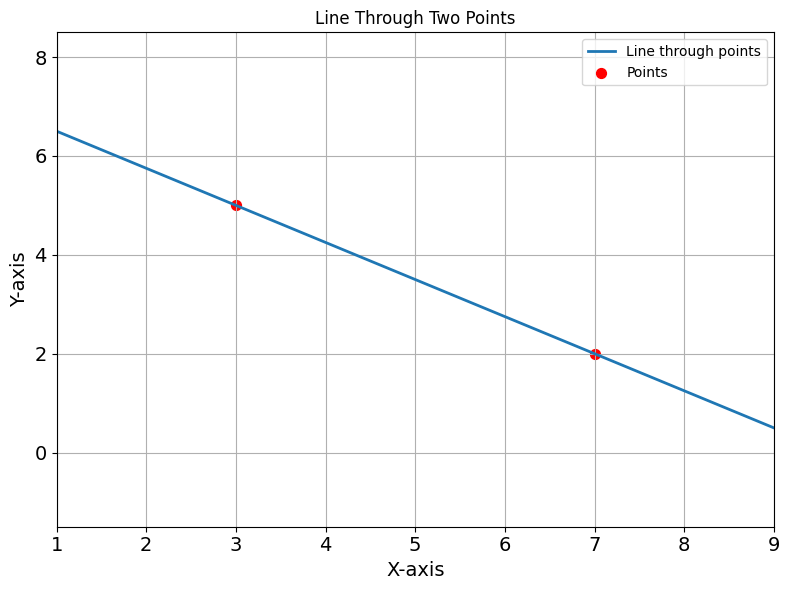

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points
x1, y1 = 3, 5
x2, y2 = 7, 2

# Calculate the slope and intercept of the line
slope = (y2 - y1) / (x2 - x1)
intercept = y1 - slope * x1

# Generate x values for the line
x_line = np.linspace(min(x1, x2) - 1, max(x1, x2) + 1, 100)

# Calculate y values for the line
y_line = slope * x_line + intercept

# Calculate y values at the edges of the x-axis
y_edge_left = slope * (min(x1, x2) - 2) + intercept
y_edge_right = slope * (max(x1, x2) + 2) + intercept

# Plot the points and the line
plt.figure(figsize=(8, 6))
plt.plot([min(x1, x2) - 2, max(x1, x2) + 2], [y_edge_left, y_edge_right], label='Line through points',
         linewidth=2)  # Increase line thickness

# Set plot limits
plt.xlim(min(x1, x2) - 2, max(x1, x2) + 2)
plt.ylim(min(min(y1, y2), y_edge_left, y_edge_right) - 2,
         max(max(y1, y2), y_edge_left, y_edge_right) + 2)

plt.scatter([x1, x2], [y1, y2], color='red',
            label='Points', s=50)

plt.title('Line Through Two Points')
plt.xlabel('X-axis', fontsize=14)  # Set font size for axis labels
plt.ylabel('Y-axis', fontsize=14)
plt.xticks(fontsize=14)  # Set font size for tic marks
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure labels do not get cut off
plt.show()

Problem 2:

Load data from the following parquet file (URL below) into Python. Make nice plots presenting the data as fully as possible. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load parquet data
df = pd.read_parquet(
    "https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet")

# Display information about the dataset
print(df.head())
print("Column names:", df.columns)

       var1      var2      var3  class
0  2.220386  3.088938  5.309324      1
1 -1.112359  1.838144  0.725785      0
2 -0.687695  1.747231  1.059535      0
3 -2.875016  1.718303 -1.156714      0
4 -2.010930  1.327895 -0.683035      0
Column names: Index(['var1', 'var2', 'var3', 'class'], dtype='object')


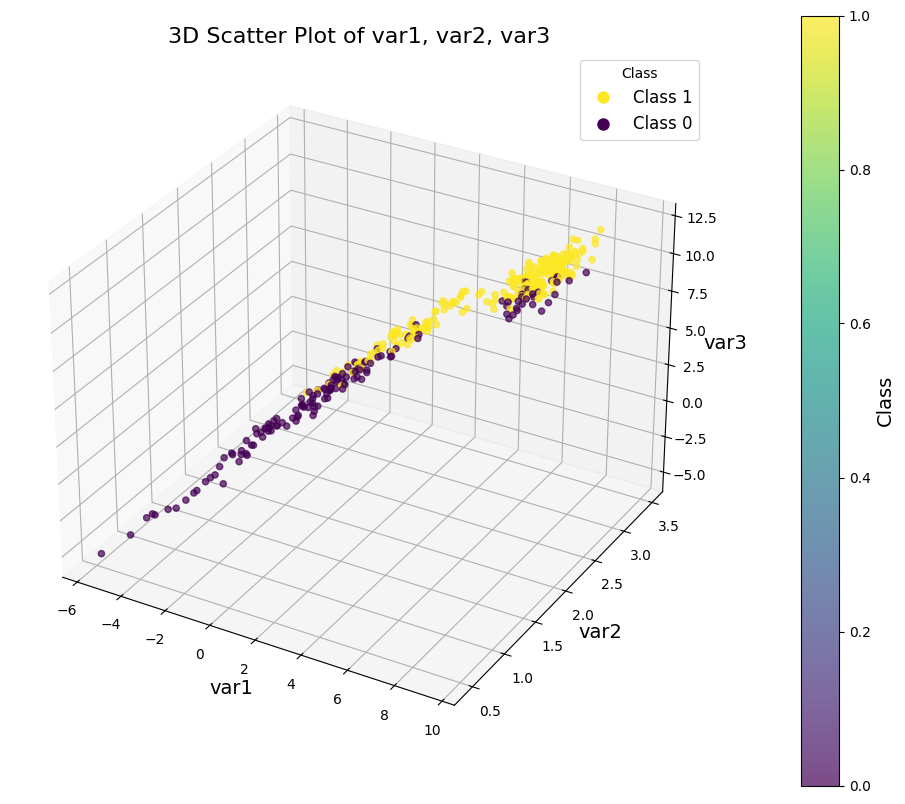

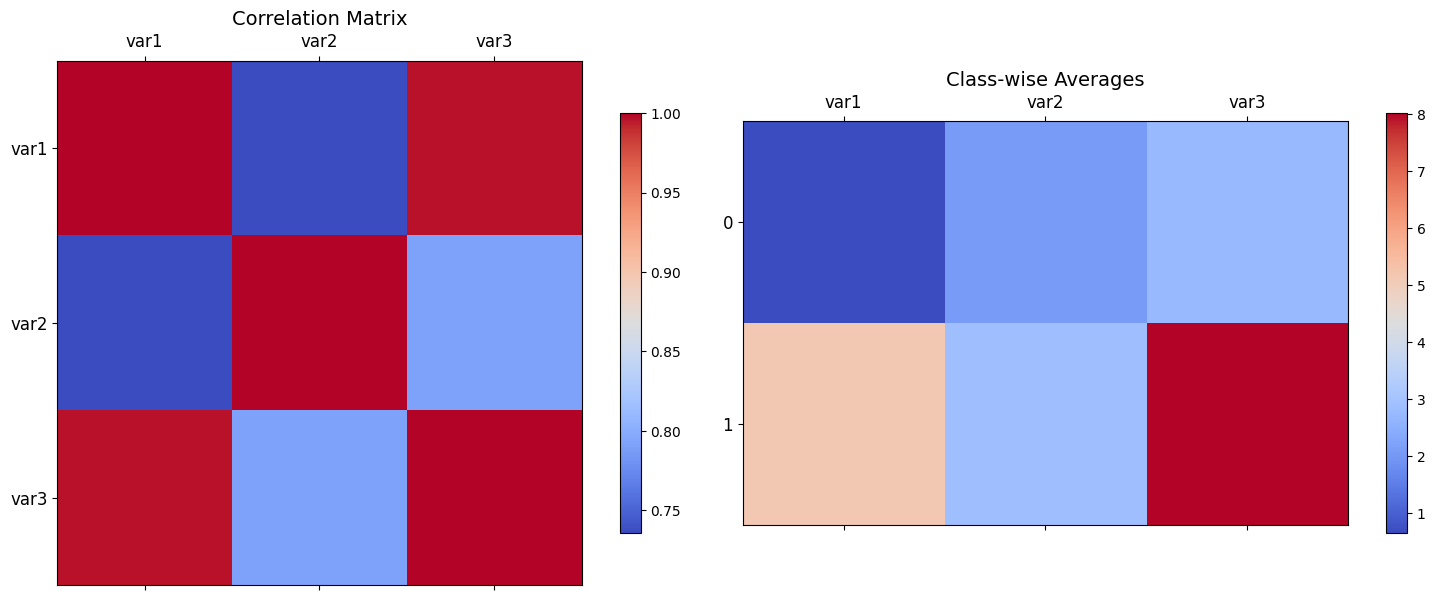

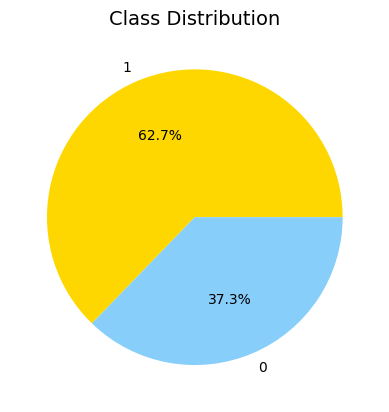

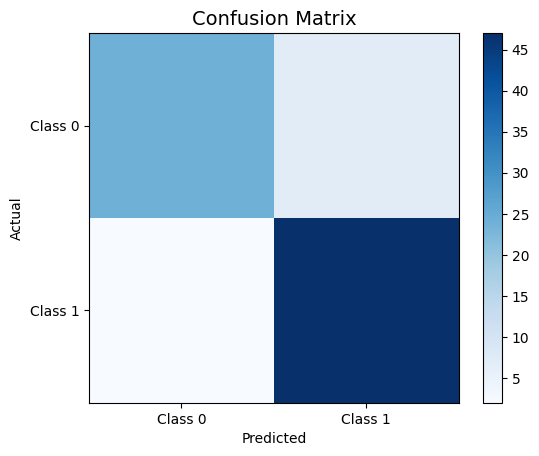

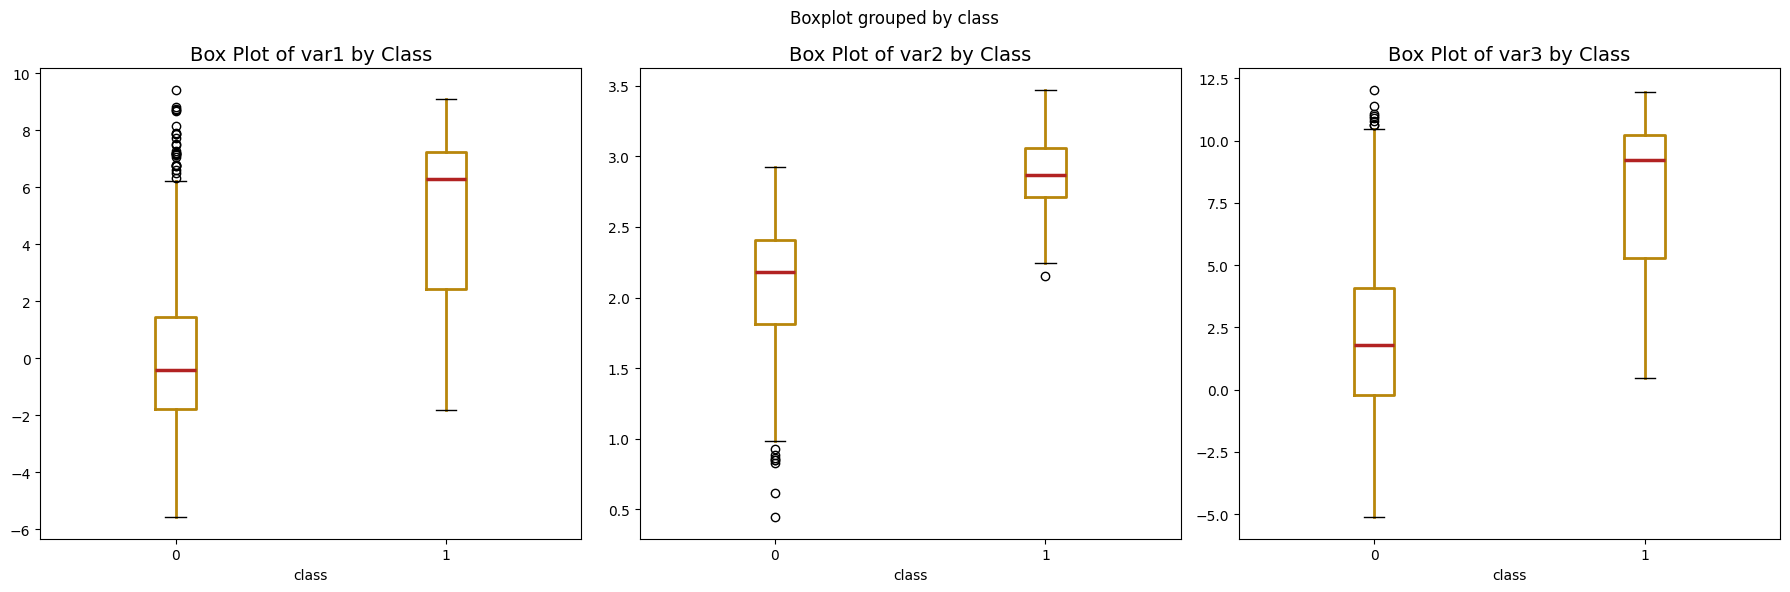

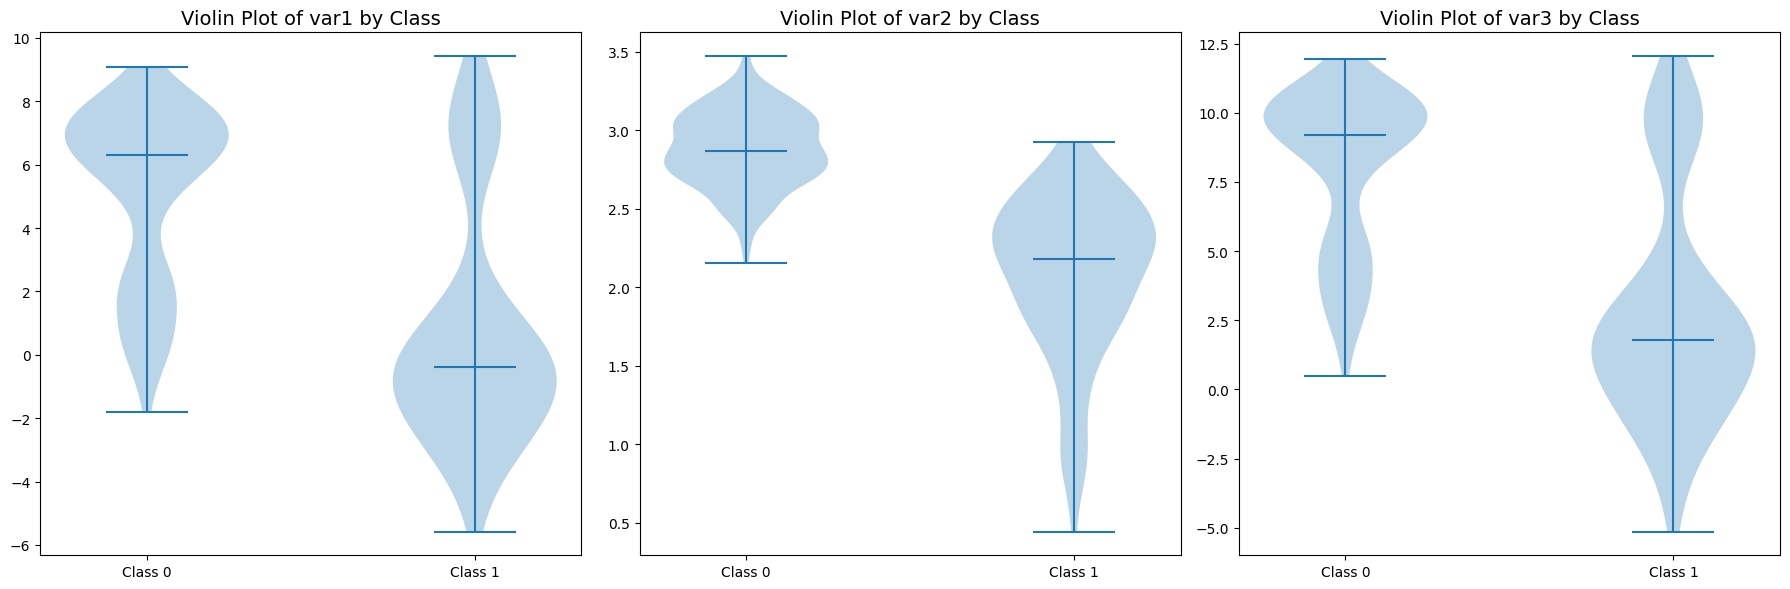

In [3]:
# Column names in the data set using the above output
column1_name = df.columns[0]
column2_name = df.columns[1]
column3_name = df.columns[2]

# Creating a 3D scatter plot using the three columns in the data set and class
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on the 'class' column
sc = ax.scatter(df[column1_name], df[column2_name], df[column3_name],
                c=df['class'], cmap='viridis', alpha=0.7, label='Scatter Plot')

# Set labels for each axis
ax.set_xlabel(column1_name, fontsize=14)
ax.set_ylabel(column2_name, fontsize=14)
ax.set_zlabel(column3_name, fontsize=14)

# Set title for the plot
ax.set_title('3D Scatter Plot of var1, var2, var3', fontsize=16)

# Create legend for different classes
legend_labels = {0: 'Class 0', 1: 'Class 1'}
classes = df['class'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sc.cmap(
    sc.norm(c)), markersize=10, label=legend_labels[c]) for c in classes]
ax.legend(handles=handles, title='Class', fontsize=12)

# Adding colorbar
cb = fig.colorbar(sc, pad=0.1)
cb.set_label('Class', fontsize=14)

plt.show()

# Plotting Heatmaps for Correlation Matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for correlation matrix
cax1 = axes[0].matshow(
    df[[column1_name, column2_name, column3_name]].corr(), cmap='coolwarm')
fig.colorbar(cax1, ax=axes[0], shrink=0.8)
axes[0].set_xticks(
    np.arange(len(df[[column1_name, column2_name, column3_name]].corr().columns)))
axes[0].set_yticks(
    np.arange(len(df[[column1_name, column2_name, column3_name]].corr().index)))
axes[0].set_xticklabels(
    df[[column1_name, column2_name, column3_name]].corr().columns, fontsize=12)
axes[0].set_yticklabels(
    df[[column1_name, column2_name, column3_name]].corr().index, fontsize=12)
axes[0].set_title('Correlation Matrix', fontsize=14)

# Heatmap for class-wise averages
cax2 = axes[1].matshow(df.groupby('class').mean(), cmap='coolwarm')
fig.colorbar(cax2, ax=axes[1], shrink=0.8)
axes[1].set_xticks(np.arange(len(df.groupby('class').mean().columns)))
axes[1].set_yticks(np.arange(len(df.groupby('class').mean().index)))
axes[1].set_xticklabels(df.groupby('class').mean().columns, fontsize=12)
axes[1].set_yticklabels(df.groupby('class').mean().index, fontsize=12)
axes[1].set_title('Class-wise Averages', fontsize=14)

plt.tight_layout()
plt.show()


# Pie Chart
class_counts = df['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index,
        autopct='%1.1f%%', colors=['gold', 'lightskyblue'])
plt.title('Class Distribution', fontsize=14)
plt.show()

# Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=14)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Box Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

boxprops = dict(linewidth=2, color='darkgoldenrod')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
whiskerprops = dict(linestyle='-', linewidth=2, color='darkgoldenrod')

df.boxplot(column=column1_name, by='class', grid=False,
           ax=axes[0], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops)
axes[0].set_title(f'Box Plot of {column1_name} by Class', fontsize=14)

df.boxplot(column=column2_name, by='class', grid=False,
           ax=axes[1], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops)
axes[1].set_title(f'Box Plot of {column2_name} by Class', fontsize=14)

df.boxplot(column=column3_name, by='class', grid=False,
           ax=axes[2], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops)
axes[2].set_title(f'Box Plot of {column3_name} by Class', fontsize=14)

plt.tight_layout()
plt.show()

# Violin Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate([column1_name, column2_name, column3_name]):
    values = [df[df['class'] == cl][col].values for cl in df['class'].unique()]
    axes[i].violinplot(values, showmeans=False, showmedians=True)
    axes[i].set_title(f'Violin Plot of {col} by Class', fontsize=14)
    axes[i].set_xticks([1, 2])
    axes[i].set_xticklabels(['Class 0', 'Class 1'])

plt.tight_layout()
plt.show()